# JSTOR data parser

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from collections import Counter

In [4]:
from tqdm.auto import tqdm

In [5]:
from pandas.api.types import is_list_like

In [6]:
from itertools import combinations

In [7]:
import ast

## Explore file with unix tools

In [8]:
!ls

Distribution of Papers per Years.png
Distribution of Years since 1900.png
Distribution of Years.png
IMG_1045.jpeg
IMG_1046.jpeg
JSTOR database analyser.ipynb
Review
Silber-Varod&Geri_to appear in OJAKM2025.docx
content_types.png
disciplines_frequencies_main.xlsx
disciplines_frequencies_post_1949.xlsx
jstor_metadata_2025-07-30.jsonl
jstor_metadata_2025-07-30.jsonl.gz
jstor_sample_item.json
languages_frequencies_main.xlsx
lineplot.png
lineplot_dataset_manuscript.png
sample.csv
sample_item.json
sample_top_5.csv
top_30_disciplines.png
top_30_langs.png
top_50_disciplines.png
top_50_langs.png
top_85_disciplines_post_1949.png
~$disciplines_frequencies.xlsx


In [9]:
!head -n 1 jstor_metadata_2025-07-30.jsonl

{"item_id":"81e94608-c4dc-3e28-b08e-7efc0f19553c","review_required":false,"ithaka_doi":"10.2307/community.37317744","identifiers":{"print_isbn":null,"online_isbn":null,"print_issn":null,"online_issn":null,"ssid":"37317744","catsid":null,"journal_code":null,"aluka_doi":null},"title":null,"is_part_of":null,"creators_string":null,"creators":null,"publishers":null,"published_date":null,"languages":null,"discipline_names":null,"issue_number":null,"issue_volume":null,"c5_data_type":"Other","c5_section_type":"Other","content_type":"contributed_content","content_subtype":"contributed_content_documents","ccda_resource_type":"Documents","ccda_resource_subtype":"Oral Histories","collections":["Student Activism"],"contributed_content":true,"licensing_status":"Creative Commons: Attribution-NonCommercial-NoDerivs","url":"www.jstor.org/stable/10.2307/community.37317744"}


## Load into a pandas dataframe (chunks)

In [10]:
# Initialize empty list to collect smaller DataFrames
chunks = []

In [11]:
# Process the file line by line in chunks of 100,000 rows
with pd.read_json("jstor_metadata_2025-07-30.jsonl", lines=True, chunksize=100_000) as reader:
    for chunk in reader:
        # Optional: filter or process chunk here
        chunks.append(chunk)



In [12]:
# Concatenate all chunks into one big DataFrame
df = pd.concat(chunks, ignore_index=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12388841 entries, 0 to 12388840
Data columns (total 24 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   item_id                object
 1   review_required        bool  
 2   ithaka_doi             object
 3   identifiers            object
 4   title                  object
 5   is_part_of             object
 6   creators_string        object
 7   creators               object
 8   publishers             object
 9   published_date         object
 10  languages              object
 11  discipline_names       object
 12  issue_number           object
 13  issue_volume           object
 14  c5_data_type           object
 15  c5_section_type        object
 16  content_type           object
 17  content_subtype        object
 18  ccda_resource_type     object
 19  ccda_resource_subtype  object
 20  collections            object
 21  contributed_content    bool  
 22  licensing_status       object
 23  url  

In [13]:
df.head()

,item_id,review_required,ithaka_doi,identifiers,title,is_part_of,creators_string,creators,publishers,published_date,...,c5_data_type,c5_section_type,content_type,content_subtype,ccda_resource_type,ccda_resource_subtype,collections,contributed_content,licensing_status,url
0,81e94608-c4dc-3e28-b08e-7efc0f19553c,False,10.2307/community.37317744,"{'print_isbn': None, 'online_isbn': None, 'pri...",None,None,None,None,None,None,...,Other,Other,contributed_content,contributed_content_documents,Documents,Oral Histories,[Student Activism],True,Creative Commons: Attribution-NonCommercial-No...,www.jstor.org/stable/10.2307/community.37317744
1,c78ba12f-c452-34f9-971d-41f7c92c029a,False,10.2307/resrep02929,"{'print_isbn': None, 'online_isbn': None, 'pri...",None,None,None,None,None,0001-01-0,...,Report,Other,research_report,Other,None,None,None,False,open_access,www.jstor.org/stable/10.2307/resrep02929
2,3bd59245-4fdc-37a5-ad1d-fac00ed360b5,False,10.2307/resrep05076.15,"{'print_isbn': None, 'online_isbn': None, 'pri...",APPENDIX D – TABLE 3,None,None,None,[Center for Security Policy],2011-01-0,...,Report,Other,multi_part_research_report_part,Other,None,None,None,False,open_access,www.jstor.org/stable/10.2307/resrep05076.15
3,5513359a-3505-3010-8edd-a5281ab9edce,False,10.2307/resrep05076.17,"{'print_isbn': None, 'online_isbn': None, 'pri...",APPENDIX F – TABLE 5,None,None,None,[Center for Security Policy],2011-01-0,...,Report,Other,multi_part_research_report_part,Other,None,None,None,False,open_access,www.jstor.org/stable/10.2307/resrep05076.17
4,b0bbc294-d989-314e-b9b1-3a23ed7de3d6,False,10.2307/resrep05076.20,"{'print_isbn': None, 'online_isbn': None, 'pri...",APPENDIX I - CHART 2,None,None,None,[Center for Security Policy],2011-01-0,...,Report,Other,multi_part_research_report_part,Other,None,None,None,False,open_access,www.jstor.org/stable/10.2307/resrep05076.20


## One-percent sample

In [14]:
sample_df = pd.read_csv('sample.csv')

In [15]:
#sample_df = df.sample(frac=0.01, random_state=42)

In [16]:
#sample_df.to_csv('sample.csv')

In [17]:
sample_df.shape

(123888, 25)

In [18]:
sample_df.head()

,Unnamed: 0,item_id,review_required,ithaka_doi,identifiers,title,is_part_of,creators_string,creators,publishers,...,c5_data_type,c5_section_type,content_type,content_subtype,ccda_resource_type,ccda_resource_subtype,collections,contributed_content,licensing_status,url
0,12054320,4612bfc2-2aa3-387f-a365-0b873f4b60a3,True,10.2307/43795283,"{'print_isbn': None, 'online_isbn': None, 'pri...","Marathon Oil, UNCF Launch Scholarship Program",Women of Color Magazine,NaN,NaN,['Career Communications Group'],...,Journal,Article,article,research-article,NaN,NaN,['Arts & Sciences XIV Collection'],False,NaN,www.jstor.org/stable/10.2307/43795283
1,1236312,e5ef36e2-dcda-364c-b261-b0bd811235bc,True,10.2307/1468938,"{'print_isbn': None, 'online_isbn': None, 'pri...",Front Matter,Biogeochemistry,NaN,NaN,['Springer'],...,Journal,Article,article,misc,NaN,NaN,"['Biological Sciences Collection', 'Ecology & ...",False,NaN,www.jstor.org/stable/10.2307/1468938
2,4790453,7457aa45-5b32-3bf4-a521-c6768e08b5a0,True,10.2307/26642082,"{'print_isbn': None, 'online_isbn': None, 'pri...",Book Review : A Strife of Tongues: The Comprom...,Journal of the Civil War Era,"Stephen E. Maizlish, Mark J. Stegmaier","[{'first_name': 'Mark J.', 'last_name': 'Stegm...",['University of North Carolina Press'],...,Journal,Article,article,book-review,NaN,NaN,['Arts & Sciences XV Collection'],False,NaN,www.jstor.org/stable/10.2307/26642082
3,10411628,3cc64eca-7e2b-3112-a07d-8026b0c12818,True,10.2307/2079404,"{'print_isbn': None, 'online_isbn': None, 'pri...",Book Review : \n Incidents of My Life: ...,The Journal of American History,"David F. Allmendinger, <suffix>Jr</suffix>, Ch...","[{'first_name': 'Christopher', 'last_name': 'M...","['Organization of American Historians', 'Oxfor...",...,Journal,Article,article,book-review,NaN,NaN,"['Arts & Sciences I Collection', 'Corporate & ...",False,NaN,www.jstor.org/stable/10.2307/2079404
4,3931906,7760c8df-a5df-34ab-82ba-d3da5739362c,True,10.2307/43986731,"{'print_isbn': None, 'online_isbn': None, 'pri...",AT CLOSE RANGE,Inside the Pentagon,NaN,NaN,['Inside Washington Publishers'],...,Journal,Article,article,research-article,NaN,NaN,['Security Studies'],False,NaN,www.jstor.org/stable/10.2307/43986731


## Preprocessing

In [19]:
# Ensure published_date is datetime and extract year
#df['year'] = pd.to_datetime(df['published_date'], errors='coerce').dt.year THIS WORKS LIKE SHIT LOSING 90%



In [20]:
sample_df['year'] = sample_df['published_date'].str[:4]

In [21]:
sample_df['year'] 

0         2004
1         1996
2         2019
3         1992
4         1991
          ... 
123883    2020
123884    1999
123885    1933
123886    1949
123887    1982
Name: year, Length: 123888, dtype: object

In [22]:
sample_df['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 123888 entries, 0 to 123887
Series name: year
Non-Null Count   Dtype 
--------------   ----- 
123865 non-null  object
dtypes: object(1)
memory usage: 968.0+ KB


In [23]:
df['year'] = df['published_date'].str[:4]

In [24]:
df['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12388841 entries, 0 to 12388840
Series name: year
Non-Null Count     Dtype 
--------------     ----- 
12387088 non-null  object
dtypes: object(1)
memory usage: 94.5+ MB


In [25]:
df[df['year'].isna()].shape

(1753, 25)

In [26]:
#df = df.dropna(subset=['year'])

In [27]:
df['year'] = df['year'].fillna('0')

In [28]:
df.shape

(12388841, 25)

In [29]:
df['year'] = df['year'].astype(int)

In [30]:
df = df[df['year'] > 0]

In [31]:
df.shape

(12387088, 25)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12387088 entries, 1 to 12388840
Data columns (total 25 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   item_id                object
 1   review_required        bool  
 2   ithaka_doi             object
 3   identifiers            object
 4   title                  object
 5   is_part_of             object
 6   creators_string        object
 7   creators               object
 8   publishers             object
 9   published_date         object
 10  languages              object
 11  discipline_names       object
 12  issue_number           object
 13  issue_volume           object
 14  c5_data_type           object
 15  c5_section_type        object
 16  content_type           object
 17  content_subtype        object
 18  ccda_resource_type     object
 19  ccda_resource_subtype  object
 20  collections            object
 21  contributed_content    bool  
 22  licensing_status       object
 23  url       

## Early exploration

In [33]:
df_after_1949 = df[df['year'] >= 1949]

In [34]:
def plot_title_keyword_frequencies(df, substrings):
    
    # Drop rows with missing year or missing title
    df = df.dropna(subset=['year', 'title'])
    
    # Count total number of titles per year
    df['title'] = df['title'].astype(str)
    df['token_count'] = df['title'].apply(lambda x: len(x.split()))
    
    freq_data = {}

    for substring in substrings:
        # Count occurrences of substring (case-insensitive)
        df[substring + '_count'] = df['title'].str.lower().str.count(substring.lower())
        
        # Aggregate per year
        yearly = df.groupby('year').agg({
            substring + '_count': 'sum',
            'token_count': 'sum'
        })
        
        # Calculate relative frequency
        yearly[substring + '_freq'] = yearly[substring + '_count'] / yearly['token_count']
        freq_data[substring] = yearly[substring + '_freq']

    # Combine all frequencies into one DataFrame for plotting
    freq_df = pd.DataFrame(freq_data)

    # Plot
    freq_df.plot(kind='line', figsize=(10, 6))
    plt.title("Relative Frequency of Strings in Title by Year")
    plt.xlabel("Year")
    plt.ylabel("Relative Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'lineplot_{'_'.join(substrings)}.png', dpi=300)
    plt.show()


In [34]:
#plot_title_keyword_frequencies(df_after_1949, substrings=['dataset', 'manuscript'])

In [35]:
#plot_title_keyword_frequencies(df_after_1949, substrings=['digital', 'computational'])

In [36]:
#plot_title_keyword_frequencies(df_after_1949, substrings=['database', 'programming', 'computer', 'server'])

In [44]:
sample_df.head().to_csv('sample_top_5.csv')

## Data exploration and filtering

In [37]:
df.columns

Index(['item_id', 'review_required', 'ithaka_doi', 'identifiers', 'title',
       'is_part_of', 'creators_string', 'creators', 'publishers',
       'published_date', 'languages', 'discipline_names', 'issue_number',
       'issue_volume', 'c5_data_type', 'c5_section_type', 'content_type',
       'content_subtype', 'ccda_resource_type', 'ccda_resource_subtype',
       'collections', 'contributed_content', 'licensing_status', 'url',
       'year'],
      dtype='object')

In [35]:
df_after_1949.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10123776 entries, 2 to 12388840
Data columns (total 25 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   item_id                object
 1   review_required        bool  
 2   ithaka_doi             object
 3   identifiers            object
 4   title                  object
 5   is_part_of             object
 6   creators_string        object
 7   creators               object
 8   publishers             object
 9   published_date         object
 10  languages              object
 11  discipline_names       object
 12  issue_number           object
 13  issue_volume           object
 14  c5_data_type           object
 15  c5_section_type        object
 16  content_type           object
 17  content_subtype        object
 18  ccda_resource_type     object
 19  ccda_resource_subtype  object
 20  collections            object
 21  contributed_content    bool  
 22  licensing_status       object
 23  url       

/var/folders/1f/9yycmpbn4ql_z5685cqb9_8c0000gn/T/ipykernel_12191/2194926394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_1949["year"] = df_after_1949["year"].astype(int)


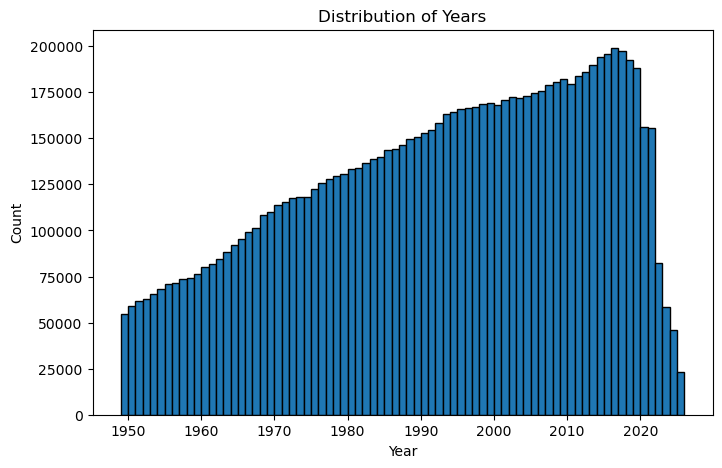

In [36]:
df_after_1949["year"] = df_after_1949["year"].astype(int)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df_after_1949["year"], bins=range(df_after_1949["year"].min(), df_after_1949["year"].max() + 2), edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of Years")
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12387088 entries, 1 to 12388840
Data columns (total 25 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   item_id                object
 1   review_required        bool  
 2   ithaka_doi             object
 3   identifiers            object
 4   title                  object
 5   is_part_of             object
 6   creators_string        object
 7   creators               object
 8   publishers             object
 9   published_date         object
 10  languages              object
 11  discipline_names       object
 12  issue_number           object
 13  issue_volume           object
 14  c5_data_type           object
 15  c5_section_type        object
 16  content_type           object
 17  content_subtype        object
 18  ccda_resource_type     object
 19  ccda_resource_subtype  object
 20  collections            object
 21  contributed_content    bool  
 22  licensing_status       object
 23  url       

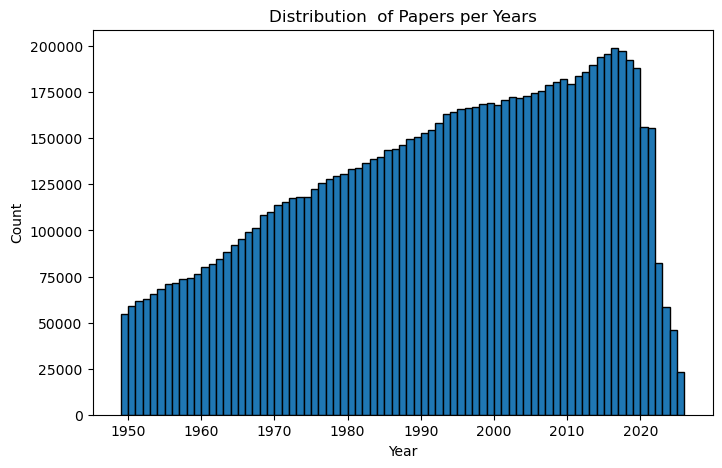

In [38]:
#df_after_1700 = df[df['year'] > 1700]
years = df_after_1949["year"] #.dropna().astype(int)

plt.figure(figsize=(8,5))
plt.hist(years, bins=range(years.min(), years.max() + 2), edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution  of Papers per Years")
plt.savefig('Distribution of Papers per Years.png', dpi=300)
plt.show()

In [ ]:
#del df_after_1700

In [ ]:
# df_after_1900 = df[df['year'] > 1900]
# years = df_after_1900["year"] #.dropna().astype(int)

# plt.figure(figsize=(8,5))
# plt.hist(years, bins=range(years.min(), years.max() + 2), edgecolor="black")
# plt.xlabel("Year")
# plt.ylabel("Count")
# plt.title("Distribution of Years")
# plt.savefig('Distribution of Years since 1900.png', dpi=300)
# plt.show()

In [ ]:
# df_after_1900.info()

In [ ]:
del df # to free up some memory

## Disciplines

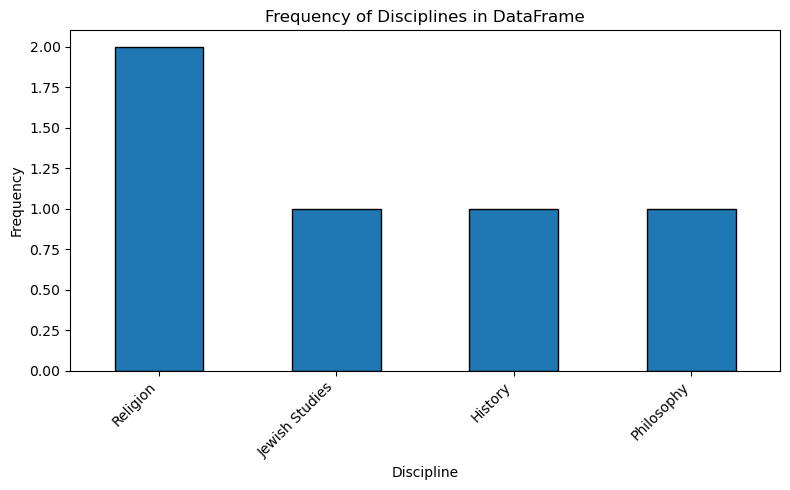

In [50]:
# Example dataframe
df = pd.DataFrame({
    "year": [2000, 2001, 2002],
    "discipline_names": [
        ["Religion", "Jewish Studies"],
        ["History"],
        ["Religion", "Philosophy"]
    ]
})

# Explode the lists into separate rows
df_exploded = df.explode("discipline_names")

# Count frequencies
discipline_counts = df_exploded["discipline_names"].value_counts()

# Plot
plt.figure(figsize=(8,5))
discipline_counts.plot(kind="bar", edgecolor="black")
plt.xlabel("Discipline")
plt.ylabel("Frequency")
plt.title("Frequency of Disciplines in DataFrame")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [51]:
del df

In [52]:
# TOO SLOW
# # Explode the lists into separate rows
# df_exploded = df_after_1900.explode("discipline_names")

# # Count frequencies
# discipline_counts = df_exploded["discipline_names"].value_counts()

# # Plot
# plt.figure(figsize=(8,5))
# discipline_counts.plot(kind="bar", edgecolor="black")
# plt.xlabel("Discipline")
# plt.ylabel("Frequency")
# plt.title("Frequency of Disciplines in DataFrame")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.show()

Counting disciplines:   0%|          | 0/10123776 [00:00<?, ?it/s]

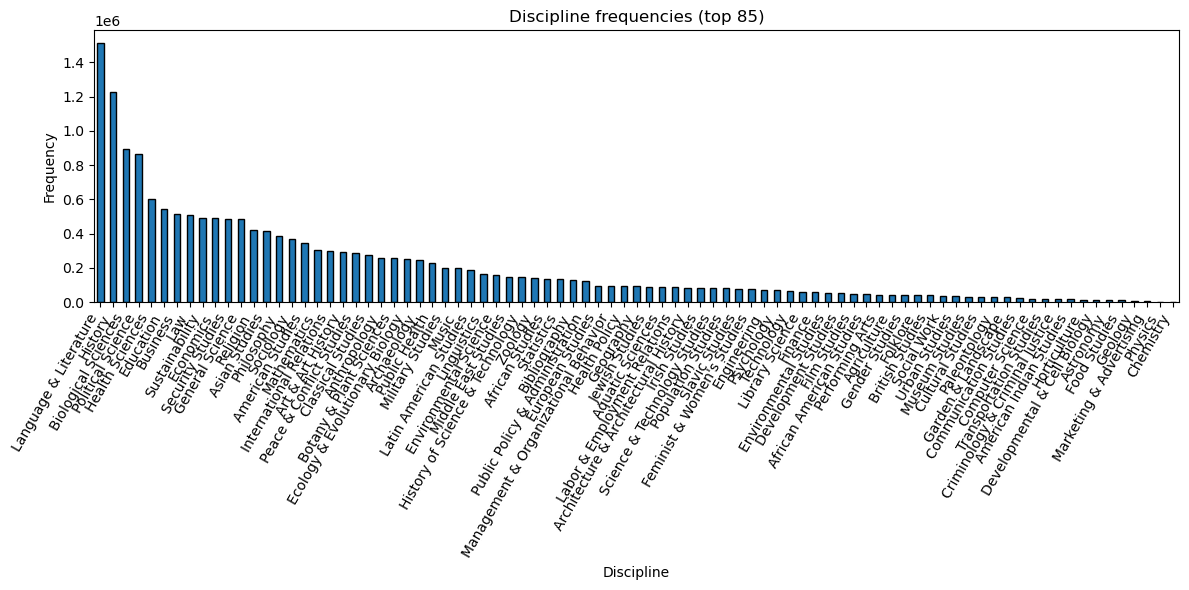

In [53]:
# Assume df exists, with a column 'discipline_names' that holds lists (or NaN)

counts = Counter()

# Iterate with progress bar

for v in tqdm(df_after_1949["discipline_names"].values, 
              total=len(df_after_1949), desc="Counting disciplines"):
    # Treat lists/tuples/ndarrays specially (but not strings)
    if is_list_like(v) and not isinstance(v, (str, bytes)):
        # If you want unique per row, use: iterable = set(v)
        iterable = v
        for x in iterable:
            if not pd.isna(x):
                counts[x] += 1
    else:
        # Scalar path
        if not pd.isna(v):
            counts[v] += 1

discipline_counts = pd.Series(counts, dtype="int64").sort_values(ascending=False)

# (Optional) plot top-N
import matplotlib.pyplot as plt
topN = 85
plt.figure(figsize=(12,6))
discipline_counts.head(topN).plot(kind="bar", edgecolor="black")
plt.xlabel("Discipline")
plt.ylabel("Frequency")
plt.title(f"Discipline frequencies (top {topN})")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.savefig(f'top_{topN}_disciplines.png', dpi=300)
plt.show()

In [55]:
plt.savefig(f'top_{topN}_disciplines_post_1949.png', dpi=300)

<Figure size 640x480 with 0 Axes>

In [ ]:
len(counts)

In [ ]:
counts

In [ ]:
counts['Language & Literature']

In [ ]:
discipline_counts.shape

In [56]:
discipline_counts.to_excel('disciplines_frequencies_post_1949.xlsx', header=False)

## Languages

In [1]:
df_after_1949["languages"][:5]

NameError: name 'df_after_1949' is not defined

In [ ]:
# Assume df exists, with a column 'discipline_names' that holds lists (or NaN)

lang_counts = Counter()

# Iterate with progress bar

for v in tqdm(df_after_1949["languages"].values, 
              total=len(df_after_1949)):
    # Treat lists/tuples/ndarrays specially (but not strings)
    if is_list_like(v) and not isinstance(v, (str, bytes)):
        # If you want unique per row, use: iterable = set(v)
        iterable = v
        for x in iterable:
            if not pd.isna(x):
                lang_counts[x] += 1
    else:
        # Scalar path
        if not pd.isna(v):
            lang_counts[v] += 1

lang_counts = pd.Series(lang_counts, dtype="int64").sort_values(ascending=False)


In [ ]:
lang_counts

In [ ]:

# (Optional) plot top-N
import matplotlib.pyplot as plt
topN = 50
plt.figure(figsize=(12,6))
lang_counts.head(topN).plot(kind="bar", edgecolor="black")
plt.xlabel("Discipline")
plt.ylabel("Frequency")
plt.title(f"Discipline frequencies (top {topN})")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.savefig(f'top_{topN}_langs_post1949.png', dpi=300)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
topN = 30
plt.figure(figsize=(12,6))
lang_counts.head(topN).plot(kind="bar", edgecolor="black")
plt.xlabel("Language")
plt.ylabel("Frequency")
plt.title(f"Language frequencies (top {topN})")
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.savefig(f'top_{topN}_langs_post1949.png', dpi=300)
plt.show()

In [ ]:
lang_counts[:10]

In [ ]:
lang_counts[:10] / lang_counts.sum()

In [ ]:
6.226694 * (10**-2)

In [ ]:
lang_counts.to_excel('languages_frequencies_post1949.xlsx', header=False)

## Content types

In [ ]:
df_after_1949.columns

In [ ]:
sample_df.info()

In [ ]:
sample_df['content_type'].value_counts()

In [ ]:
# # Count frequencies
content_type_counts = df_after_1949["content_type"].value_counts()

# Plot
plt.figure(figsize=(8,5))
content_type_counts.plot(kind="bar", edgecolor="black")
plt.xlabel("Discipline")
plt.ylabel("Frequency")
plt.title("Frequency of Disciplines in DataFrame")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('content_types.png')
plt.show()

In [ ]:
content_type_counts 

In [ ]:
content_type_counts / content_type_counts.sum()

# October 2025 work package

* Discipline category: calculate trends; co-occurrences.
* Year category: our study will focus on the years 1949-2024
* Frequencies of disciplines per year and per language. Are disciplines appear also in other languages than Eng?
* Nitza and Vered will create a list of search queries for the titles. Daniil will then review it. For this task, it would be better if we have txt/csv files with list of titles per discipline with indication of year. If possible, also csv per language. Is this possible? 
* DOI: Daniil will remove duplicates and re do the frequency graphs.
* Daniil, Nitza and I looked at our data from last year when we started this research.  Our manual advanced queries in JSTOR showed exactly the same steep decline of publications from 2018 (pick year) and on.

Thank you both
Vered

### DOI deduplication

In [ ]:
#for col in df.columns:
#    df[col] = None
#del df
#gc.collect()

In [57]:
df_after_1949.shape[0]

10123776

In [49]:
df_after_1949['ithaka_doi'].count()

10123776

In [40]:
df_after_1949['ithaka_doi'].nunique()

10123776

In [39]:
def _parse_list(x):
    """Return a Python list from a cell that may be a list or a stringified list."""
    if isinstance(x, list):
        items = x
    elif pd.isna(x):
        return []
    else:
        # Safely parse strings like "['A', 'B']" or '["A","B"]'
        items = ast.literal_eval(str(x))
    # Normalize: strip whitespace, drop empties, dedupe within a row
    cleaned = {str(i).strip() for i in items if str(i).strip()}
    return list(cleaned)

def cooccurrence_from_df(df, col="discipline_names"):
    counter = Counter()
    for items in df[col].map(_parse_list):
        if len(items) >= 2:
            # Sort to enforce undirected canonical order (A,B) with A<=B
            for a, b in combinations(sorted(items), 2):
                counter[(a, b)] += 1

    # Build edge list DataFrame
    edges = pd.DataFrame(
        [(a, b, w) for (a, b), w in counter.items()],
        columns=["Source", "Target", "Weight"]
    ).sort_values(["Source", "Target"], ignore_index=True)

    return edges


In [40]:
edges = cooccurrence_from_df(sample_df)

In [41]:
edges

,Source,Target,Weight
0,African American Studies,African Studies,71
1,African American Studies,American Indian Studies,4
2,African American Studies,American Studies,136
3,African American Studies,Art & Art History,2
4,African American Studies,Asian Studies,7
...,...,...,...
1278,Sustainability,Transportation Studies,23
1279,Sustainability,Urban Studies,182
1280,Sustainability,Zoology,1
1281,Technology,Transportation Studies,6


In [42]:
edges.to_csv('edges_sample.csv')

In [43]:
edges_huge = cooccurrence_from_df(df_after_1949)

In [44]:
edges_huge.to_csv('discipline_cooc.csv', index=False)

In [46]:
edges_df_filtered = edges_huge[edges_huge["Weight"] >= 1000].copy()
edges_df_filtered.to_csv("discipline_cooccurrence_ge1000.csv", index=False)

## Non-chunked crashes for memory shortage

In [ ]:
#df = pd.read_json("jstor_metadata_2025-07-30.jsonl", lines=True)

In [ ]:
#print(df.info())
#print(df.head())